### <b>Part III : Linear Regression</b>

In this part, we implement a linear regression model and apply this model to solve a problem based on the real-world dataset.<br>

Implement linear regression using the ordinary least squares (OLS) method to perform direct minimization of the squared loss function.

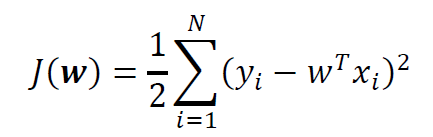

In matrix-vector notation, the loss function can be written as:

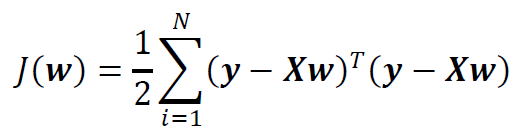

<br>
where 𝑿 is the input data matrix, 𝒚 is the target vector, and 𝒘 is the weight vector for regression.

### <br>
### <b>DATASET</b><br>
For this Part, you can work with a dataset that you preprocessed in Part I or any other dataset from ‘noisy_dataset’ folder except from ‘penguin’ dataset.

### <br>
### <b>STEPS :</b><br>

1. Import required libraries (not allowed: scikit-learn or any other libraries with in-built functions that help to implement ML).

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Mounting the google drive that contains the pre-processed dataset

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<br>
<br>

2. Perform a data analysis and data preprocessing for your selected dataset. You can reuse your code from Part I. The dataset should come from ‘noisy_dataset’ and it should not be ‘penguins’

In [ ]:
# Let us first import the dataset we want to use

diamond_df = pd.read_csv("/content/drive/MyDrive/Datasets/diamond_preprocessed.csv")
diamond_df

,Unnamed: 0,carat,color,table,price,x,y,z
0,0,0.098155,1,0.285714,0.000000,0.039497,0.053763,0.235023
1,1,0.087965,1,0.789916,0.000000,0.028725,0.028674,0.207373
2,2,0.098155,1,0.476545,0.000087,0.057451,0.069892,0.207373
3,3,0.128726,6,0.537815,0.000698,0.084381,0.098566,0.281106
4,4,0.138917,7,0.537815,0.000785,0.109515,0.120072,0.308756
...,...,...,...,...,...,...,...,...
53935,53935,0.347818,0,0.453782,0.212055,0.362657,0.372760,0.481567
53936,53936,0.347818,0,0.285714,0.212055,0.351885,0.370968,0.506912
53937,53937,0.337628,0,0.705882,0.212055,0.346499,0.358423,0.495392
53938,53938,0.419151,5,0.537815,0.212055,0.434470,0.437276,0.536866


In [ ]:
# Let us apply the pre-processing concepts that we used for assignment 1

# Let us print the shape of the dataset
diamond_df.shape

(53940, 8)

In [ ]:
# Printing the main statistics of the dataset - including mean, standard
# deviation, and other relevant statistics

# We have taken this piece of code from "Assignment 1 - PART 1"
diamond_df.describe()

,Unnamed: 0,carat,color,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26969.500000,0.352563,3.300945,0.476545,0.246557,0.358902,0.367847,0.490106
std,15571.281097,0.206698,2.413792,0.178968,0.230359,0.197602,0.197716,0.157218
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13484.750000,0.174583,1.000000,0.369748,0.054955,0.179533,0.188172,0.347926
50%,26969.500000,0.337628,4.000000,0.453782,0.184752,0.357271,0.365591,0.490106
75%,40454.250000,0.495578,5.000000,0.621849,0.358535,0.500898,0.510753,0.603687
max,53939.000000,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Lets print the columns of the dataset

# We have taken this piece of code form "Assignment 1 - PART 1"

print(diamond_df.columns.tolist())

['Unnamed: 0', 'carat', 'color', 'table', 'price', 'x', 'y', 'z']


In [ ]:
# We saw that there is a feature known as "Unnamed : 0". Let us remove it because
# it contains nothing but row number

diamond_df = diamond_df.drop(columns = 'Unnamed: 0', axis = 1)

In [ ]:

diamond_df

,carat,color,table,price,x,y,z
0,0.098155,1,0.285714,0.000000,0.039497,0.053763,0.235023
1,0.087965,1,0.789916,0.000000,0.028725,0.028674,0.207373
2,0.098155,1,0.476545,0.000087,0.057451,0.069892,0.207373
3,0.128726,6,0.537815,0.000698,0.084381,0.098566,0.281106
4,0.138917,7,0.537815,0.000785,0.109515,0.120072,0.308756
...,...,...,...,...,...,...,...
53935,0.347818,0,0.453782,0.212055,0.362657,0.372760,0.481567
53936,0.347818,0,0.285714,0.212055,0.351885,0.370968,0.506912
53937,0.337628,0,0.705882,0.212055,0.346499,0.358423,0.495392
53938,0.419151,5,0.537815,0.212055,0.434470,0.437276,0.536866


In [ ]:
# Let us see the first 15 rows of the dataset - we just want to see a sample of
# the dataset (considering it as the population)

# We have taken this piece of code form "Assignment 1 - PART "

diamond_df.head(15)

,carat,color,table,price,x,y,z
0,0.098155,1,0.285714,0.000000,0.039497,0.053763,0.235023
1,0.087965,1,0.789916,0.000000,0.028725,0.028674,0.207373
2,0.098155,1,0.476545,0.000087,0.057451,0.069892,0.207373
3,0.128726,6,0.537815,0.000698,0.084381,0.098566,0.281106
4,0.138917,7,0.537815,0.000785,0.109515,0.120072,0.308756
5,0.103250,7,0.453782,0.000872,0.037702,0.050179,0.246544
6,0.103250,6,0.453782,0.000872,0.039497,0.053763,0.244240
7,0.000000,5,0.155317,0.000872,0.061041,0.077061,0.258065
8,0.093060,1,0.789916,0.000960,0.025135,0.017921,0.248848
9,0.098155,5,0.789916,0.001047,0.048474,0.066308,0.225806


In [ ]:
# Lets check for missing values (or say, NaN values) in the dataset

# But before making changes, we would like to make a copy of the dataset so that
# if we encounter any mishappening, we can reuse the variables
# that contains the original dataset

# We have taken this piece of code form "Assignment 1 - PART 1"

diamond_df_copy = diamond_df.copy(deep=True)

In [ ]:
features_list = diamond_df_copy.columns.tolist()
print(features_list)

['carat', 'color', 'table', 'price', 'x', 'y', 'z']


In [ ]:
# Lets find the mean values of the fetures left in the dataset

# We have taken this piece of code form "Assignment 1 - PART 1"

features_mean = []

for i in features_list:
  features_mean.append(diamond_df_copy[i].mean())

In [ ]:
print(features_mean)

[0.3525626930977975, 3.3009454949944383, 0.4765451098004048, 0.24655699602398132, 0.358901737695911, 0.3678471253355073, 0.49010634245256707]


In [ ]:
# Let replace "NaN" values with the mean values we got

# We have taken this piece of code form "Assignment 1 - PART 1"

for i,j in zip(features_list, features_mean):
    diamond_df_copy [i].fillna(value = j, inplace = True)

In [ ]:
# Lets have a look to the modified dataset

diamond_df_copy

,carat,color,table,price,x,y,z
0,0.098155,1,0.285714,0.000000,0.039497,0.053763,0.235023
1,0.087965,1,0.789916,0.000000,0.028725,0.028674,0.207373
2,0.098155,1,0.476545,0.000087,0.057451,0.069892,0.207373
3,0.128726,6,0.537815,0.000698,0.084381,0.098566,0.281106
4,0.138917,7,0.537815,0.000785,0.109515,0.120072,0.308756
...,...,...,...,...,...,...,...
53935,0.347818,0,0.453782,0.212055,0.362657,0.372760,0.481567
53936,0.347818,0,0.285714,0.212055,0.351885,0.370968,0.506912
53937,0.337628,0,0.705882,0.212055,0.346499,0.358423,0.495392
53938,0.419151,5,0.537815,0.212055,0.434470,0.437276,0.536866





carat 🔽


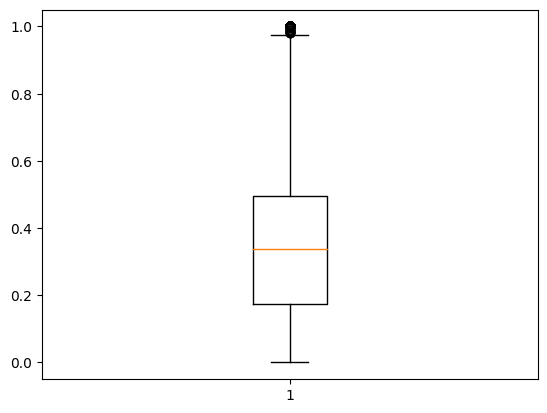




color 🔽


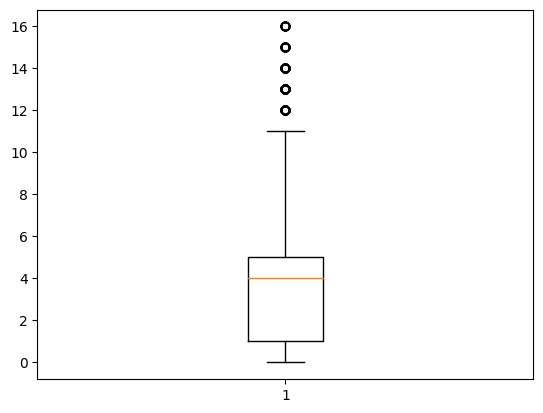




table 🔽


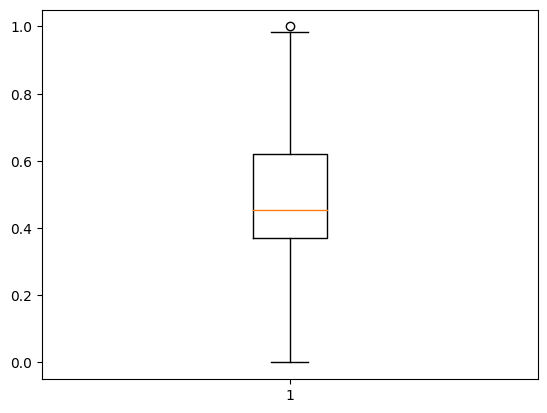




price 🔽


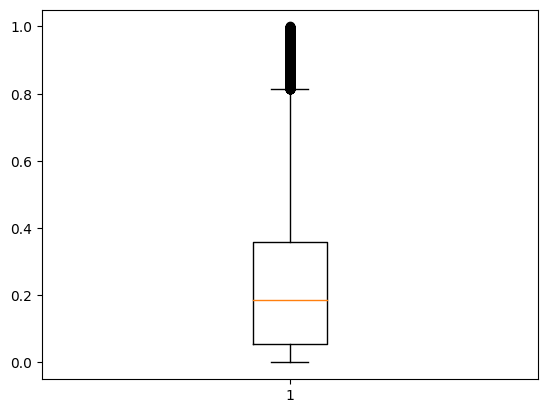




x 🔽


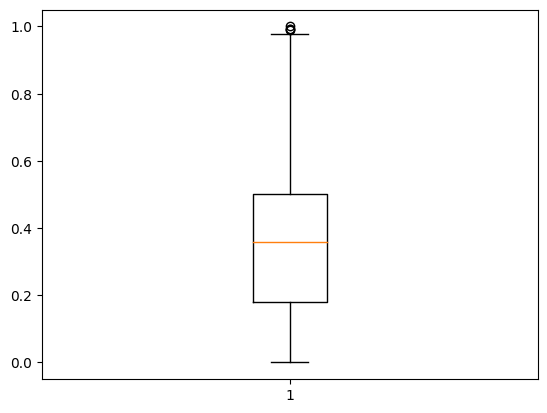




y 🔽


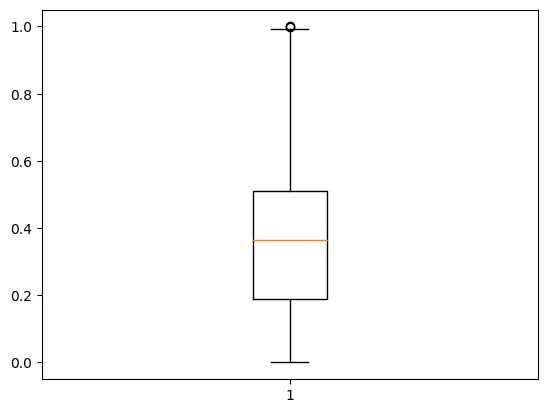




z 🔽


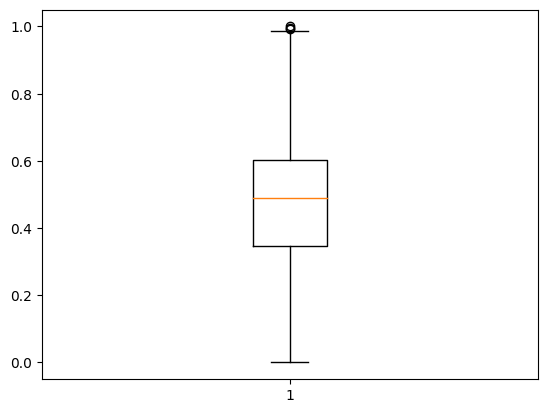

In [ ]:
# As this dataset has no categorical values, we don't have to carry out
# One-Hot Encoding. Also, this dataset is already scaled in the range (0,1)

# We can now check for any existing outliers using the box plots

# We have taken this piece of code form "Assignment 1 - PART 1"

# Lets create boxplots

for i in features_list:
  print("\n\n\n"+i+" 🔽")
  plt.boxplot(diamond_df_copy[i])
  plt.show()

In [ ]:
# We have found out that this dataset has some outliers, let us remove them using
# IQR (Inter Quartile Range)

# We have taken this piece of code form "Assignment 1 - PART 1"

# We need to remove all the outliers from all the features / columns
# Thus, we need a function for the same

def outliers_removal(feature):
    Q1 = np.percentile(feature, 25)
    Q3 = np.percentile(feature, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    cleaned_data = []
    # cleaned_data = [i for i in feature if lower_bound <= i <= upper_bound]
    for i in feature:
      if (lower_bound <= i <= upper_bound):
        cleaned_data.append(i)
      else:
        cleaned_data.append('NaN') # Where we will found an outlier, we will replace
                                   # that with the 'NaN' value (for the time being)

    return cleaned_data

# Now lets put this function into action !

for i in features_list:
  diamond_df_copy[i] = outliers_removal(diamond_df_copy[i])


In [ ]:
# Lets print the dataset

diamond_df_copy

,carat,color,table,price,x,y,z
0,0.098155,1,0.285714,0.0,0.039497,0.053763,0.235023
1,0.087965,1,0.789916,0.0,0.028725,0.028674,0.207373
2,0.098155,1,0.476545,0.000087,0.057451,0.069892,0.207373
3,0.128726,6,0.537815,0.000698,0.084381,0.098566,0.281106
4,0.138917,7,0.537815,0.000785,0.109515,0.120072,0.308756
...,...,...,...,...,...,...,...
53935,0.347818,0,0.453782,0.212055,0.362657,0.37276,0.481567
53936,0.347818,0,0.285714,0.212055,0.351885,0.370968,0.506912
53937,0.337628,0,0.705882,0.212055,0.346499,0.358423,0.495392
53938,0.419151,5,0.537815,0.212055,0.43447,0.437276,0.536866


In [ ]:
# Now we will replace the 'NaN' values with the mean values of the features
# As it will be less skewed.

# We have taken this piece of code form "Assignment 1 - PART 1"

for i in features_list:
  for j in range(0, diamond_df_copy[i].count()):
    if (diamond_df_copy[i][j] == 'NaN'):
      diamond_df_copy[i][j] = np.nan

In [ ]:
diamond_df_copy

,carat,color,table,price,x,y,z
0,0.098155,1,0.285714,0.0,0.039497,0.053763,0.235023
1,0.087965,1,0.789916,0.0,0.028725,0.028674,0.207373
2,0.098155,1,0.476545,0.000087,0.057451,0.069892,0.207373
3,0.128726,6,0.537815,0.000698,0.084381,0.098566,0.281106
4,0.138917,7,0.537815,0.000785,0.109515,0.120072,0.308756
...,...,...,...,...,...,...,...
53935,0.347818,0,0.453782,0.212055,0.362657,0.37276,0.481567
53936,0.347818,0,0.285714,0.212055,0.351885,0.370968,0.506912
53937,0.337628,0,0.705882,0.212055,0.346499,0.358423,0.495392
53938,0.419151,5,0.537815,0.212055,0.43447,0.437276,0.536866


In [ ]:
features_mean = []

for i in features_list:
  features_mean.append(diamond_df_copy[i].mean())

for i,j in zip(features_list, features_mean):
    diamond_df_copy[i].fillna(value = j, inplace = True)

In [ ]:
# Here we can conclude that there will be non 'NaN' values
# in the dataset

# We will be showing a significant portion of the dataset to prove the above
# As the whole dataset cannot be shown in Google Colab (Thanks to Truncating !)

# We have taken this piece of code form "Assignment 1 - PART 1"

diamond_df_copy

,carat,color,table,price,x,y,z
0,0.098155,1.0,0.285714,0.000000,0.039497,0.053763,0.235023
1,0.087965,1.0,0.789916,0.000000,0.028725,0.028674,0.207373
2,0.098155,1.0,0.476545,0.000087,0.057451,0.069892,0.207373
3,0.128726,6.0,0.537815,0.000698,0.084381,0.098566,0.281106
4,0.138917,7.0,0.537815,0.000785,0.109515,0.120072,0.308756
...,...,...,...,...,...,...,...
53935,0.347818,0.0,0.453782,0.212055,0.362657,0.372760,0.481567
53936,0.347818,0.0,0.285714,0.212055,0.351885,0.370968,0.506912
53937,0.337628,0.0,0.705882,0.212055,0.346499,0.358423,0.495392
53938,0.419151,5.0,0.537815,0.212055,0.434470,0.437276,0.536866


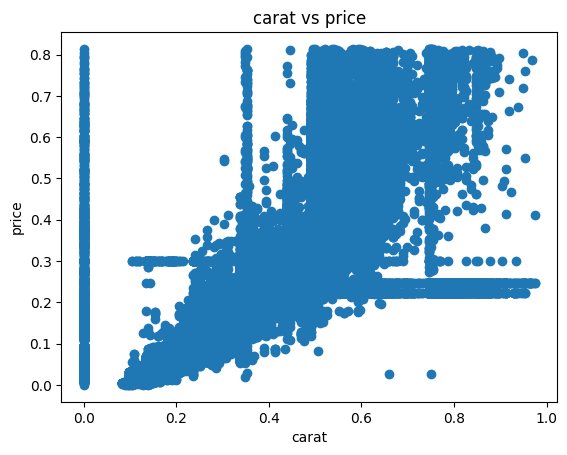

In [ ]:
# Lets have a look into different types graphs through which we can represent
# the data and infer some patterns

# We are taking the code from "PART 1" of this assignment

# 1. Scatter plot - carat vs price

plt.scatter(diamond_df_copy['carat'], diamond_df_copy['price'])
plt.xlabel("carat")
plt.ylabel("price")
plt.title("carat vs price")
plt.show()

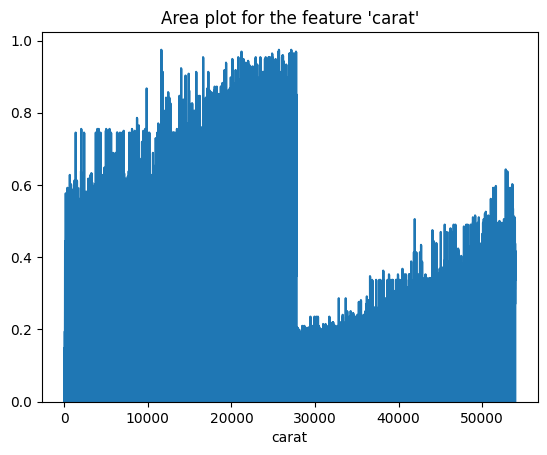

In [ ]:
# 2. Area plot for color

diamond_df_copy['carat'].plot.area()
plt.xlabel("carat")
plt.title("Area plot for the feature 'carat'")
plt.show()

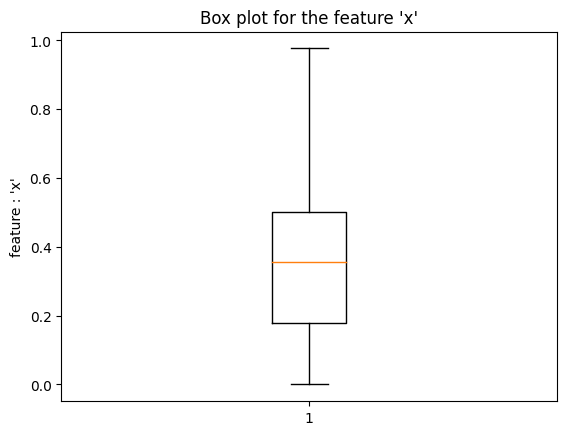

In [ ]:

# 3. Box plot for the feature 'x'

plt.boxplot(diamond_df_copy['x'])
plt.ylabel("feature : 'x'")
plt.title("Box plot for the feature 'x'")
plt.show()

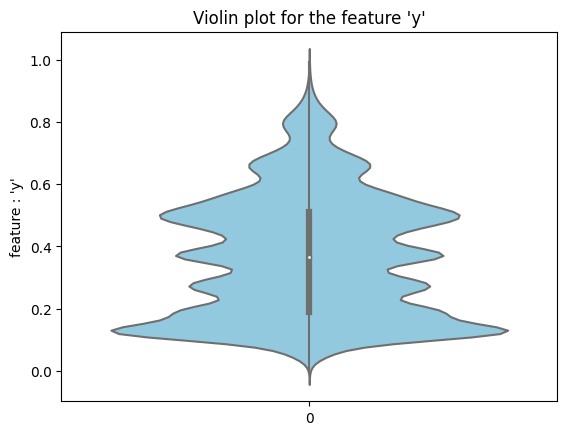

In [ ]:
# 4. Violin plot : 'y'

sns.violinplot(data=diamond_df_copy['y'], color='skyblue')
plt.ylabel("feature : 'y'")
plt.title("Violin plot for the feature 'y'")
plt.show()

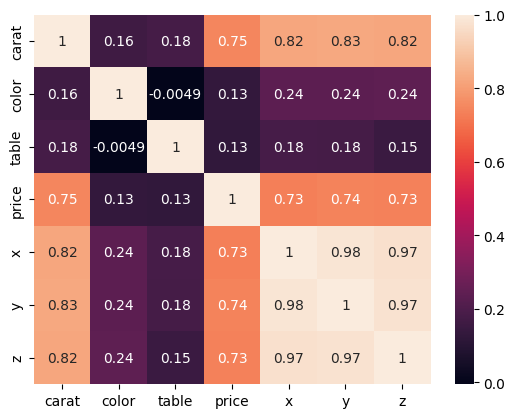

In [ ]:
# 5. Correlation Matrix

# Let us have a look into the correlation matrix
# among the features of the dataset

# We have taken this piece of code from "Assignment 1 - PART 1"

cor_mat = diamond_df_copy.corr()
heatMap = sns.heatmap(diamond_df_copy.corr(), annot=True)

In [ ]:
# We can see that the features "color" & "table" has ZERO correlation with all
# the other features of the dataset. Thus, it's better to drop them off

diamond_df_copy = diamond_df_copy.drop(columns = ['color', 'table'],axis=1)

In [ ]:
diamond_df_copy

,carat,price,x,y,z
0,0.098155,0.000000,0.039497,0.053763,0.235023
1,0.087965,0.000000,0.028725,0.028674,0.207373
2,0.098155,0.000087,0.057451,0.069892,0.207373
3,0.128726,0.000698,0.084381,0.098566,0.281106
4,0.138917,0.000785,0.109515,0.120072,0.308756
...,...,...,...,...,...
53935,0.347818,0.212055,0.362657,0.372760,0.481567
53936,0.347818,0.212055,0.351885,0.370968,0.506912
53937,0.337628,0.212055,0.346499,0.358423,0.495392
53938,0.419151,0.212055,0.434470,0.437276,0.536866


In [ ]:
# Here we can conclude that our dataset is now pre-processed

<br>
<br>

3. Choose your target Y.

In [ ]:
# Here, we are chosing the feature "price" as the target value (Y_target)

y_target = diamond_df_copy['price']
y_target

0        0.000000
1        0.000000
2        0.000087
3        0.000698
4        0.000785
           ...   
53935    0.212055
53936    0.212055
53937    0.212055
53938    0.212055
53939    0.212055
Name: price, Length: 53940, dtype: float64

<br>
<br>

4. Create the data matrices for X (input) and Y (target) in a shape <b>`X = 𝑁 x 𝑑`</b> and <b>`Y = 𝑁 x 1`</b>, where `𝑁` is a number of data samples and `𝑑` is a number of features.

In [ ]:
# We have already created the y_target, now we need to create X_input

X_input = diamond_df_copy.drop(columns = 'price', axis = 1)
X_input

,carat,x,y,z
0,0.098155,0.039497,0.053763,0.235023
1,0.087965,0.028725,0.028674,0.207373
2,0.098155,0.057451,0.069892,0.207373
3,0.128726,0.084381,0.098566,0.281106
4,0.138917,0.109515,0.120072,0.308756
...,...,...,...,...
53935,0.347818,0.362657,0.372760,0.481567
53936,0.347818,0.351885,0.370968,0.506912
53937,0.337628,0.346499,0.358423,0.495392
53938,0.419151,0.434470,0.437276,0.536866


<br>
<br>

5. Divide the dataset into training and test, as 80% training, 20% testing dataset.

In [ ]:
# I am assuming that I have to divide the dataset with respect to the underlying
# concept of train_test_split() function of scikit-learn - which also
# jumbles the rows when splitting the dataset

# # We have taken this piece of code form "Assignment 1"

# The given condition is that training data should include 80% of
# the original dataset while testing data should include 20% of it

# Let us split by considering training data
train_test_splitting_ratio = 0.8

# The total number of samples in training data should be : 53940  X 0.8 = 43152
# The total number of samples in testing data should be : 53940  X 0.2 = 10788
# The values will be rounded to nearest whole numbers (integer) on the later
# stage

# Taking "carat" feature's values as the counting factor
samples_count_dataset = diamond_df_copy["carat"].count()

# 53940  X 0.8 = 43152
samples_count_train = int(samples_count_dataset * train_test_splitting_ratio)

'''
NOTE : If we remember, "train_test_split" function shuffles the samples
before splitting - to make certain that the data's distribution is maintained
(and not biased / skewed) in both the training and testing sets. We can do the
same here.
'''
index_list = np.array(range(0, samples_count_dataset))
shuffled_index_list = np.random.permutation(index_list)

# Here, we are using iloc() function to allow us to select rows as they all
# have numerical values (loc() is for string values)
X_input_shuffled = X_input.iloc[shuffled_index_list]
y_target_shuffled = y_target.iloc[shuffled_index_list]

# Lets pick the samples & segregate them into X_train, Y_train, X_test, Y_test
X_train = X_input_shuffled[:samples_count_train]
y_train = y_target_shuffled[:samples_count_train]
X_test = X_input_shuffled[samples_count_train:]
y_test = y_target_shuffled[samples_count_train:]

<br>
<br>

6. Print the shape of your X_train, y_train, X_test, y_test.

In [ ]:
# Lets print the components : X_train, y_train, X_test, y_test as well as their
# shapes

print(f"Shape of X_train : {X_train.shape}")
print("\n")
X_train

Shape of X_train : (43152, 4)




,carat,x,y,z
26421,0.857335,0.700180,0.720430,0.774194
9832,0.495578,0.508079,0.507168,0.582949
12152,0.000000,0.358902,0.521505,0.615207
44512,0.256105,0.267504,0.283154,0.419355
34905,0.154202,0.143627,0.145161,0.311060
...,...,...,...,...
47508,0.347818,0.359066,0.360215,0.488479
28339,0.149107,0.116697,0.134409,0.313364
10363,0.607672,0.560144,0.562724,0.656682
45971,0.133821,0.095153,0.107527,0.288018


In [ ]:
print(f"Shape of y_train : {y_train.shape}")
print("\n")
y_train

Shape of y_train : (43152,)




26421    0.246557
9832     0.379100
12152    0.422889
44512    0.111130
34905    0.048325
           ...   
47508    0.134334
28339    0.029658
10363    0.387910
45971    0.017446
48327    0.018318
Name: price, Length: 43152, dtype: float64

In [ ]:
print(f"Shape of X_test : {X_test.shape}")
print("\n")
X_test

Shape of X_test : (10788, 4)




,carat,x,y,z
19074,0.765622,0.678636,0.677419,0.721198
35430,0.144012,0.125673,0.129032,0.304147
33310,0.159297,0.143627,0.148746,0.334101
46195,0.235725,0.253142,0.265233,0.398618
14292,0.495578,0.358902,0.548387,0.610599
...,...,...,...,...
6187,0.373294,0.391382,0.405018,0.511521
52437,0.301962,0.323160,0.335125,0.451613
5281,0.439531,0.443447,0.458781,0.548387
17549,0.515959,0.499102,0.501792,0.596774


In [ ]:
print(f"Shape of y_test : {y_test.shape}")
print("\n")
y_test

Shape of y_test : (10788,)




19074    0.656141
35430    0.050070
33310    0.043702
46195    0.124128
14292    0.476274
           ...   
6187     0.320133
52437    0.190771
5281     0.302861
17549    0.587666
2491     0.250349
Name: price, Length: 10788, dtype: float64

<br>
<br>

7. Calculate the weights with the OLS equation:

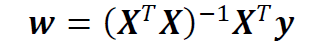

In [ ]:
# We will first obtain the transposed version of X_train
X_train_tp = np.transpose(X_train)

# Then we will do the dot product multiplication
XT_X = np.dot(X_train_tp, X_train)

# We will have find the inverse now
XT_X_inv = np.linalg.inv(XT_X)

# Now we shall do the dot-product of X_train_tp and y_train
XT_y = np.dot(X_train_tp, y_train)

# THE FINAL DOT PRODUCT
w = np.dot(XT_X_inv, XT_y)

In [ ]:
# Lets have a look into the weights

w

array([ 0.42237274,  0.13978476,  0.38906292, -0.23746329])

In [ ]:
# Let us save the weights obtained
import pickle

with open("soubhiks_imotapar_assignment1_part_3.pkl", "wb") as f:
  pickle.dump(w.tolist(), f)
  !cp soubhiks_imotapar_assignment1_part_3.pkl "drive/My Drive/"

<br>
<br>

8. Get the predictions and calculating the sum of squared errors:

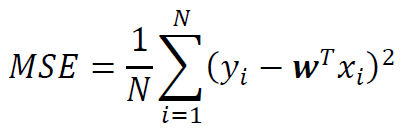

In [ ]:
# we will calculate the above from the inside of the brackets
y_predicted = np.dot(X_test, w)

# Now we can calucate the MSE (Mean Squared Error) by coding in just one line
MSE = np.mean((y_test - y_predicted)**2)

# Lets print the value of MSE
print(f"MSE (Mean Squared Error) : {MSE}")

MSE (Mean Squared Error) : 0.014587402387265521


In [ ]:
# Lets us also calculate the squared loss value (according to the formula given)

J_w = 0.5 * np.sum((y_test - y_predicted)**2)
print(J_w)

78.68444847691022


<br>
<br>

9. Plot the predictions vs the actual targets.

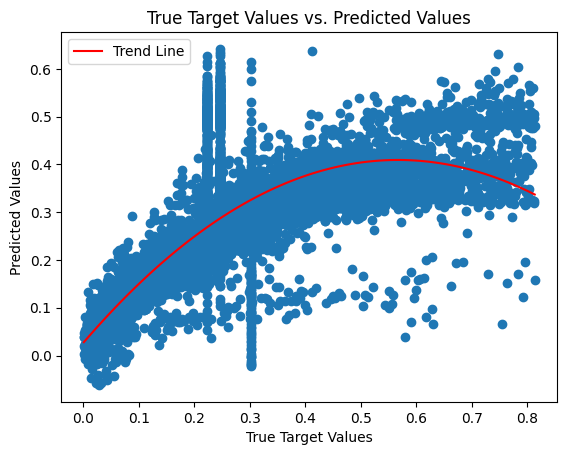

In [ ]:
# SCATTER PLOT WITH REGRESSION (TREND) LINE - CURVE

plt.scatter(y_test, y_predicted)
plt.xlabel("True Target Values")
plt.ylabel("Predicted Values")
plt.title("True Target Values vs. Predicted Values")

X = np.array(y_test)
y = y_predicted

# Defining the degree of the polynomial (say the polynomial has degree 2)
degree = 2

# Fitting a polynomial of the above mentioned degree
coefficients = np.polyfit(X, y, degree)

# Creating a polynomial function
poly_function = np.poly1d(coefficients)

# Generating points for the trend line
trend_line_x = np.linspace(min(X), max(X), 100)
trend_line_y = poly_function(trend_line_x)

# Plotting the trend line
plt.plot(trend_line_x, trend_line_y, color='red', label='Trend Line')

plt.legend()
plt.show()

<br>
<br>

### <b>Part IV: Ridge Regression</b>

Implement parameter estimation for ridge regression by minimizing the regularized squared loss as follows:

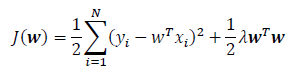

In matrix-vector notation, the squared loss can be written as:

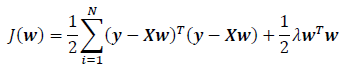

OLS equation for Ridge regression can be estimated as:

image.png

<br>

<b>DATASET</b><br>
For this Part, you can work with the same dataset that you used for Part III.
<br>
<br>

<b>STEPS</b><br>
Reuse steps from Part III while using OLS equation for Ridge regression to learn the parameters.

In [ ]:
# OLS equation for Ridge regression

# For the time being, I am setting a small value as the regularization parameter (λ)
lambda_val = 0.1

# Calculating the identity matrix
identity_matrix = np.identity(X_train.shape[1])

# Calculating (X^T * X + λ * I)
XT_X_lambdaI = np.dot(X_train_tp, X_train) + lambda_val * identity_matrix

# Calculating the inverse of (X^T * X + λ * I)
XT_X_lambdaI_inv = np.linalg.inv(XT_X_lambdaI)

# Calculating (X^T * y)
XT_y = np.dot(X_train_tp, y_train)

# Calculating the final weights (w)
w_ridge = np.dot(XT_X_lambdaI_inv, XT_y)

print(w_ridge)

[ 0.42232091  0.14014218  0.38857077 -0.23730935]


In [ ]:
# Let us save the weights obtained via Ridge Regression

with open("soubhiks_imotapar_assignment1_part_4.pkl", "wb") as f:
  pickle.dump(w_ridge.tolist(), f)
  !cp soubhiks_imotapar_assignment1_part_4.pkl "drive/My Drive/"

In [ ]:
# Calculate the new y_predicted values using Ridge Regression weights w_ridge

y_pred_ridge = np.dot(X_test, w_ridge)

In [ ]:
# Now that we have obtained the weight, it's time to obtain the squared loss

J_w = 0.5 * np.sum((y_test - y_pred_ridge)**2) + 0.5 * lambda_val * np.dot(np.transpose(w_ridge), w_ridge)

In [ ]:
# Printing the sqaured loss value

print(J_w)

78.70459216348453


In [ ]:
# Lets also print the MSE (Mean Squared Error) as well

# Now we can calucate the MSE (Mean Squared Error) by coding in just one line
MSE = np.mean((y_test - y_pred_ridge)**2)

# Lets print the value of MSE
print(f"MSE (Mean Squared Error) : {MSE}")

MSE (Mean Squared Error) : 0.014587379917640083


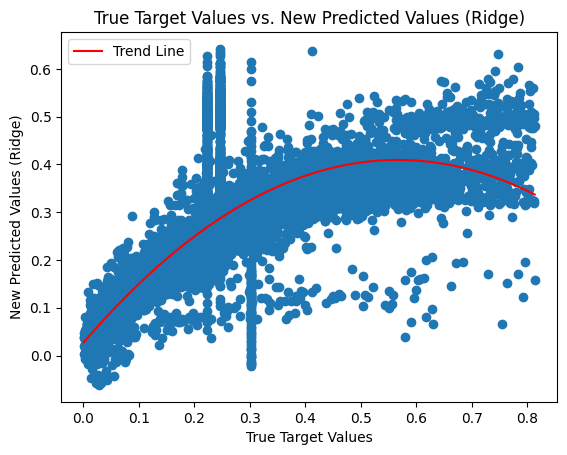

In [ ]:
# Showing the plot of the comparsion of y_test and y_pred_ridge

plt.scatter(y_test, y_pred_ridge)
plt.xlabel("True Target Values")
plt.ylabel("New Predicted Values (Ridge)")
plt.title("True Target Values vs. New Predicted Values (Ridge)")

X = np.array(y_test)
y = y_pred_ridge

# Defining the degree of the polynomial (say the polynomial has degree 2)
degree = 2

# Fitting a polynomial of the above mentioned degree
coefficients = np.polyfit(X, y, degree)

# Creating a polynomial function
poly_function = np.poly1d(coefficients)

# Generating points for the trend line
trend_line_x = np.linspace(min(X), max(X), 100)
trend_line_y = poly_function(trend_line_x)

# Plotting the trend line
plt.plot(trend_line_x, trend_line_y, color='red', label='Trend Line')

plt.legend()
plt.show()

In [ ]:
'''
References

https://numpy.org/doc/stable/index.html
https://pandas.pydata.org/
https://matplotlib.org/stable/
https://seaborn.pydata.org/
https://www.ibm.com/topics/logistic-regression
https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc
https://www.stat.yale.edu/Courses/1997-98/101/linreg.htm
https://en.wikipedia.org/wiki/Ridge_regression
'''
